<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/DL_quest/dl_master/dl_master_project_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DL Master node 10

### 목차

10. 딥러닝 프로젝트

### 10. 딥러닝 프로젝트

**학습 목표**

* Boston Housing 데이터셋을 이용해 주택 가격을 예측하는 딥러닝 모델을 실습합나다.
* Reuters 데이터넷을 이용해 텍스트로 구성된 뉴스 데이터의 주제를 분류하는 딥러닝 모델을 실습합니다.
* CIFAR10 데이터셋을 이용해 여러 객체의 이미지를 분류하는 딥러닝 모델을 실습합니다.

**데이터 로드 및 전처리**

In [ ]:
# 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

from tensorflow.keras import models
import matplotlib.pyplot as plt

In [ ]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.3,
                                                  random_state=123)

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))
print(len(x_val))
print(len(y_val))

404
102
122
122


In [ ]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.

# 입력 데이터의 각 특성의 평균을 뺍니다
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝에 만들고, 표준편차가 1이 되도록 만듭니다
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다
test_data = test_data - mean
test_data = test_data / std

**모델 구성 및 컴파일**

In [ ]:
# 문제 1-2: boston_housing 데이터셋을 활용하여 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
from tensorflow.keras import models, layers

# input_shape은 (train_data.shape[1], )으로 구성합니다.
model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1))

# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

model.save('boston_housing_model_init')
model.summary()

INFO:tensorflow:Assets written to: boston_housing_model_init/assets
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,633
Trainable params: 5,377
Non-trainable params: 256
_________________________________________________________________


**모델 학습**

In [ ]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('boston_housing_model_init',
                                           save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
9/9 [==============================] - 2s 23ms/step - loss: 562.4812 - mae: 22.0652 - val_loss: 853.2516 - val_mae: 27.9865
INFO:tensorflow:Assets written to: boston_housing_model_init/assets
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 546.2653 - mae: 21.9669 - val_loss: 787.2047 - val_mae: 26.8691
INFO:tensorflow:Assets written to: boston_housing_model_init/assets
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 536.0737 - mae: 21.8654 - val_loss: 723.8595 - val_mae: 25.7044
INFO:tensorflow:Assets written to: boston_housing_model_init/assets
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 527.6559 - mae: 21.7591 - val_loss: 677.8411 - val_mae: 24.8272
INFO:tensorflow:Assets written to: boston_housing_model_init/assets
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 518.9293 - mae: 21.6451 - val_loss: 677.2435 - val_mae: 24.8619
INFO:tensorflow:Assets written to: boston_housing_mo

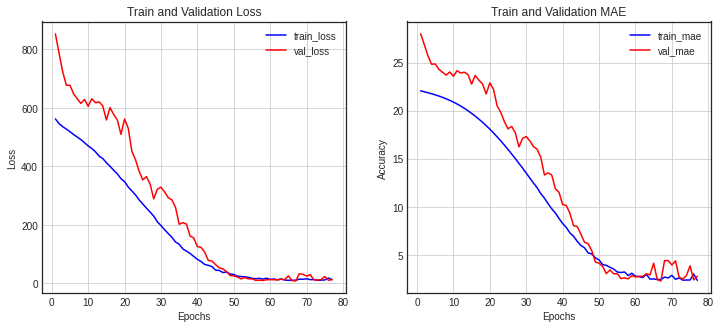

In [ ]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

**모델 평가 및 예측**

In [ ]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.

model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 1926.0728 - mae: 33.8181


[1926.07275390625, 33.81807327270508]